In [1]:
!pip install pydotplus

In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import numpy as np
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [3]:
#Loading the data
file_path = "/Users/talibahtimothy/Desktop/dataanalyticsassignments/Project4_UCI_Academic_Factors/Resources/cleaned_student_mat.csv"
data = pd.read_csv(file_path)



In [4]:
#Uncomment the next few lines of code to run the csv file. Alternative code from the Student_Predictor.ipynb
# Load the dataset
#data = pd.read_csv('Resources/student-mat.csv', delimiter=';')

In [5]:
#Uncomment the next few lines of code to run the csv file. Alternative code from the Student_Predictor.ipynb
# Remove unnecessary columns
#columns_to_remove = ["G1", "G2", "Walc", "address", "famrel", "Dalc", "guardian", "famsize"]
#data.drop(columns=[col for col in columns_to_remove if col in data.columns], errors='ignore', inplace=True)

In [6]:
#Uncomment the next few lines of code to run the csv file. Alternative code from the Student_Predictor.ipynb
# Rename columns
#data.rename(columns={"G3": "final_grade", "studytime": "Study_Time_Hours", "Fedu": "Father_Edu", "Medu": "Mother_Edu", "Pstatus": "Parent_status"}, inplace=True)

In [7]:
#Uncomment the next few lines of code to run the csv file. Alternative code from the Student_Predictor.ipynb
# Convert 'yes'/'no' to 0's and 1's
#binary_columns = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
#for col in binary_columns:
    #if col in data.columns:
        #data[col] = data[col].map({'yes': 1, 'no': 0})

In [8]:
#Uncomment the next few lines of code to run the csv file. Alternative code from the Student_Predictor.ipynb
# Handle missing values: Fill with mean for 'absences'
#if 'absences' in data.columns:
    #data['absences'].fillna(data['absences'].mean(), inplace=True)

In [9]:
#Datset
data

,school,sex,age,Parent_status,Mother_Edu,Father_Edu,Mjob,Fjob,reason,traveltime,...,activities,nursery,higher,internet,romantic,freetime,goout,health,absences,final_grade
0,GP,F,18,A,4,4,at_home,teacher,course,2,...,0,1,1,0,0,3,4,3,6,6
1,GP,F,17,T,1,1,at_home,other,course,1,...,0,0,1,1,0,3,3,3,4,6
2,GP,F,15,T,1,1,at_home,other,other,1,...,0,1,1,1,0,3,2,3,10,10
3,GP,F,15,T,4,2,health,services,home,1,...,1,1,1,1,1,2,2,5,2,15
4,GP,F,16,T,3,3,other,other,home,1,...,0,1,1,0,0,3,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,A,2,2,services,services,course,1,...,0,1,1,0,0,5,4,4,11,9
391,MS,M,17,T,3,1,services,services,course,2,...,0,0,1,1,0,4,5,2,3,16
392,MS,M,21,T,1,1,other,other,course,1,...,0,0,1,0,0,5,3,3,3,7
393,MS,M,18,T,3,2,services,other,course,3,...,0,0,1,1,0,4,1,5,0,10


In [10]:
#Assigning pass/fail for final grades greater than or equal to 15 as an integer
data["Pass_Fail"] = (data["final_grade"] >= 15).astype(int)

In [11]:
#Assigning X and y 
X = data.drop(columns = ["final_grade", "Pass_Fail"])  # Use all features except target
y = data["Pass_Fail"]

In [12]:
#Preprocessing for machiine learning using label encoding to convert each category to a unique integer
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le

In [13]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
# Create the decision tree classifier instance
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [15]:
# Making predictions using the testing data and accuracy
y_pred = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [16]:
#Printing the predictions and accuracy
print(accuracy)
print(classification_report(y_test, y_pred))

0.6708860759493671
              precision    recall  f1-score   support

           0       0.79      0.76      0.78        59
           1       0.36      0.40      0.38        20

    accuracy                           0.67        79
   macro avg       0.58      0.58      0.58        79
weighted avg       0.68      0.67      0.68        79



In [17]:
#Creating a dataframe for feature importance, dropping columns final grade and pass fail, and then sorting it according to importance
feature_importance = pd.DataFrame({
    "Feature": data.drop(columns=["final_grade", "Pass_Fail"]).columns,
    "Importance": tree_model.feature_importances_
}).sort_values(by = "Importance", ascending=False)

In [18]:
#Print the feature importance
print(feature_importance)

             Feature  Importance
23          absences    0.116200
20          freetime    0.104882
4         Mother_Edu    0.090366
6               Mjob    0.079067
8             reason    0.077947
2                age    0.067986
22            health    0.063255
21             goout    0.050796
9         traveltime    0.048039
1                sex    0.047128
7               Fjob    0.043158
11          failures    0.038519
10  Study_Time_Hours    0.033431
5         Father_Edu    0.027494
19          romantic    0.026718
16           nursery    0.026166
13            famsup    0.020151
15        activities    0.017273
14              paid    0.011335
18          internet    0.010087
0             school    0.000000
17            higher    0.000000
3      Parent_status    0.000000
12         schoolsup    0.000000


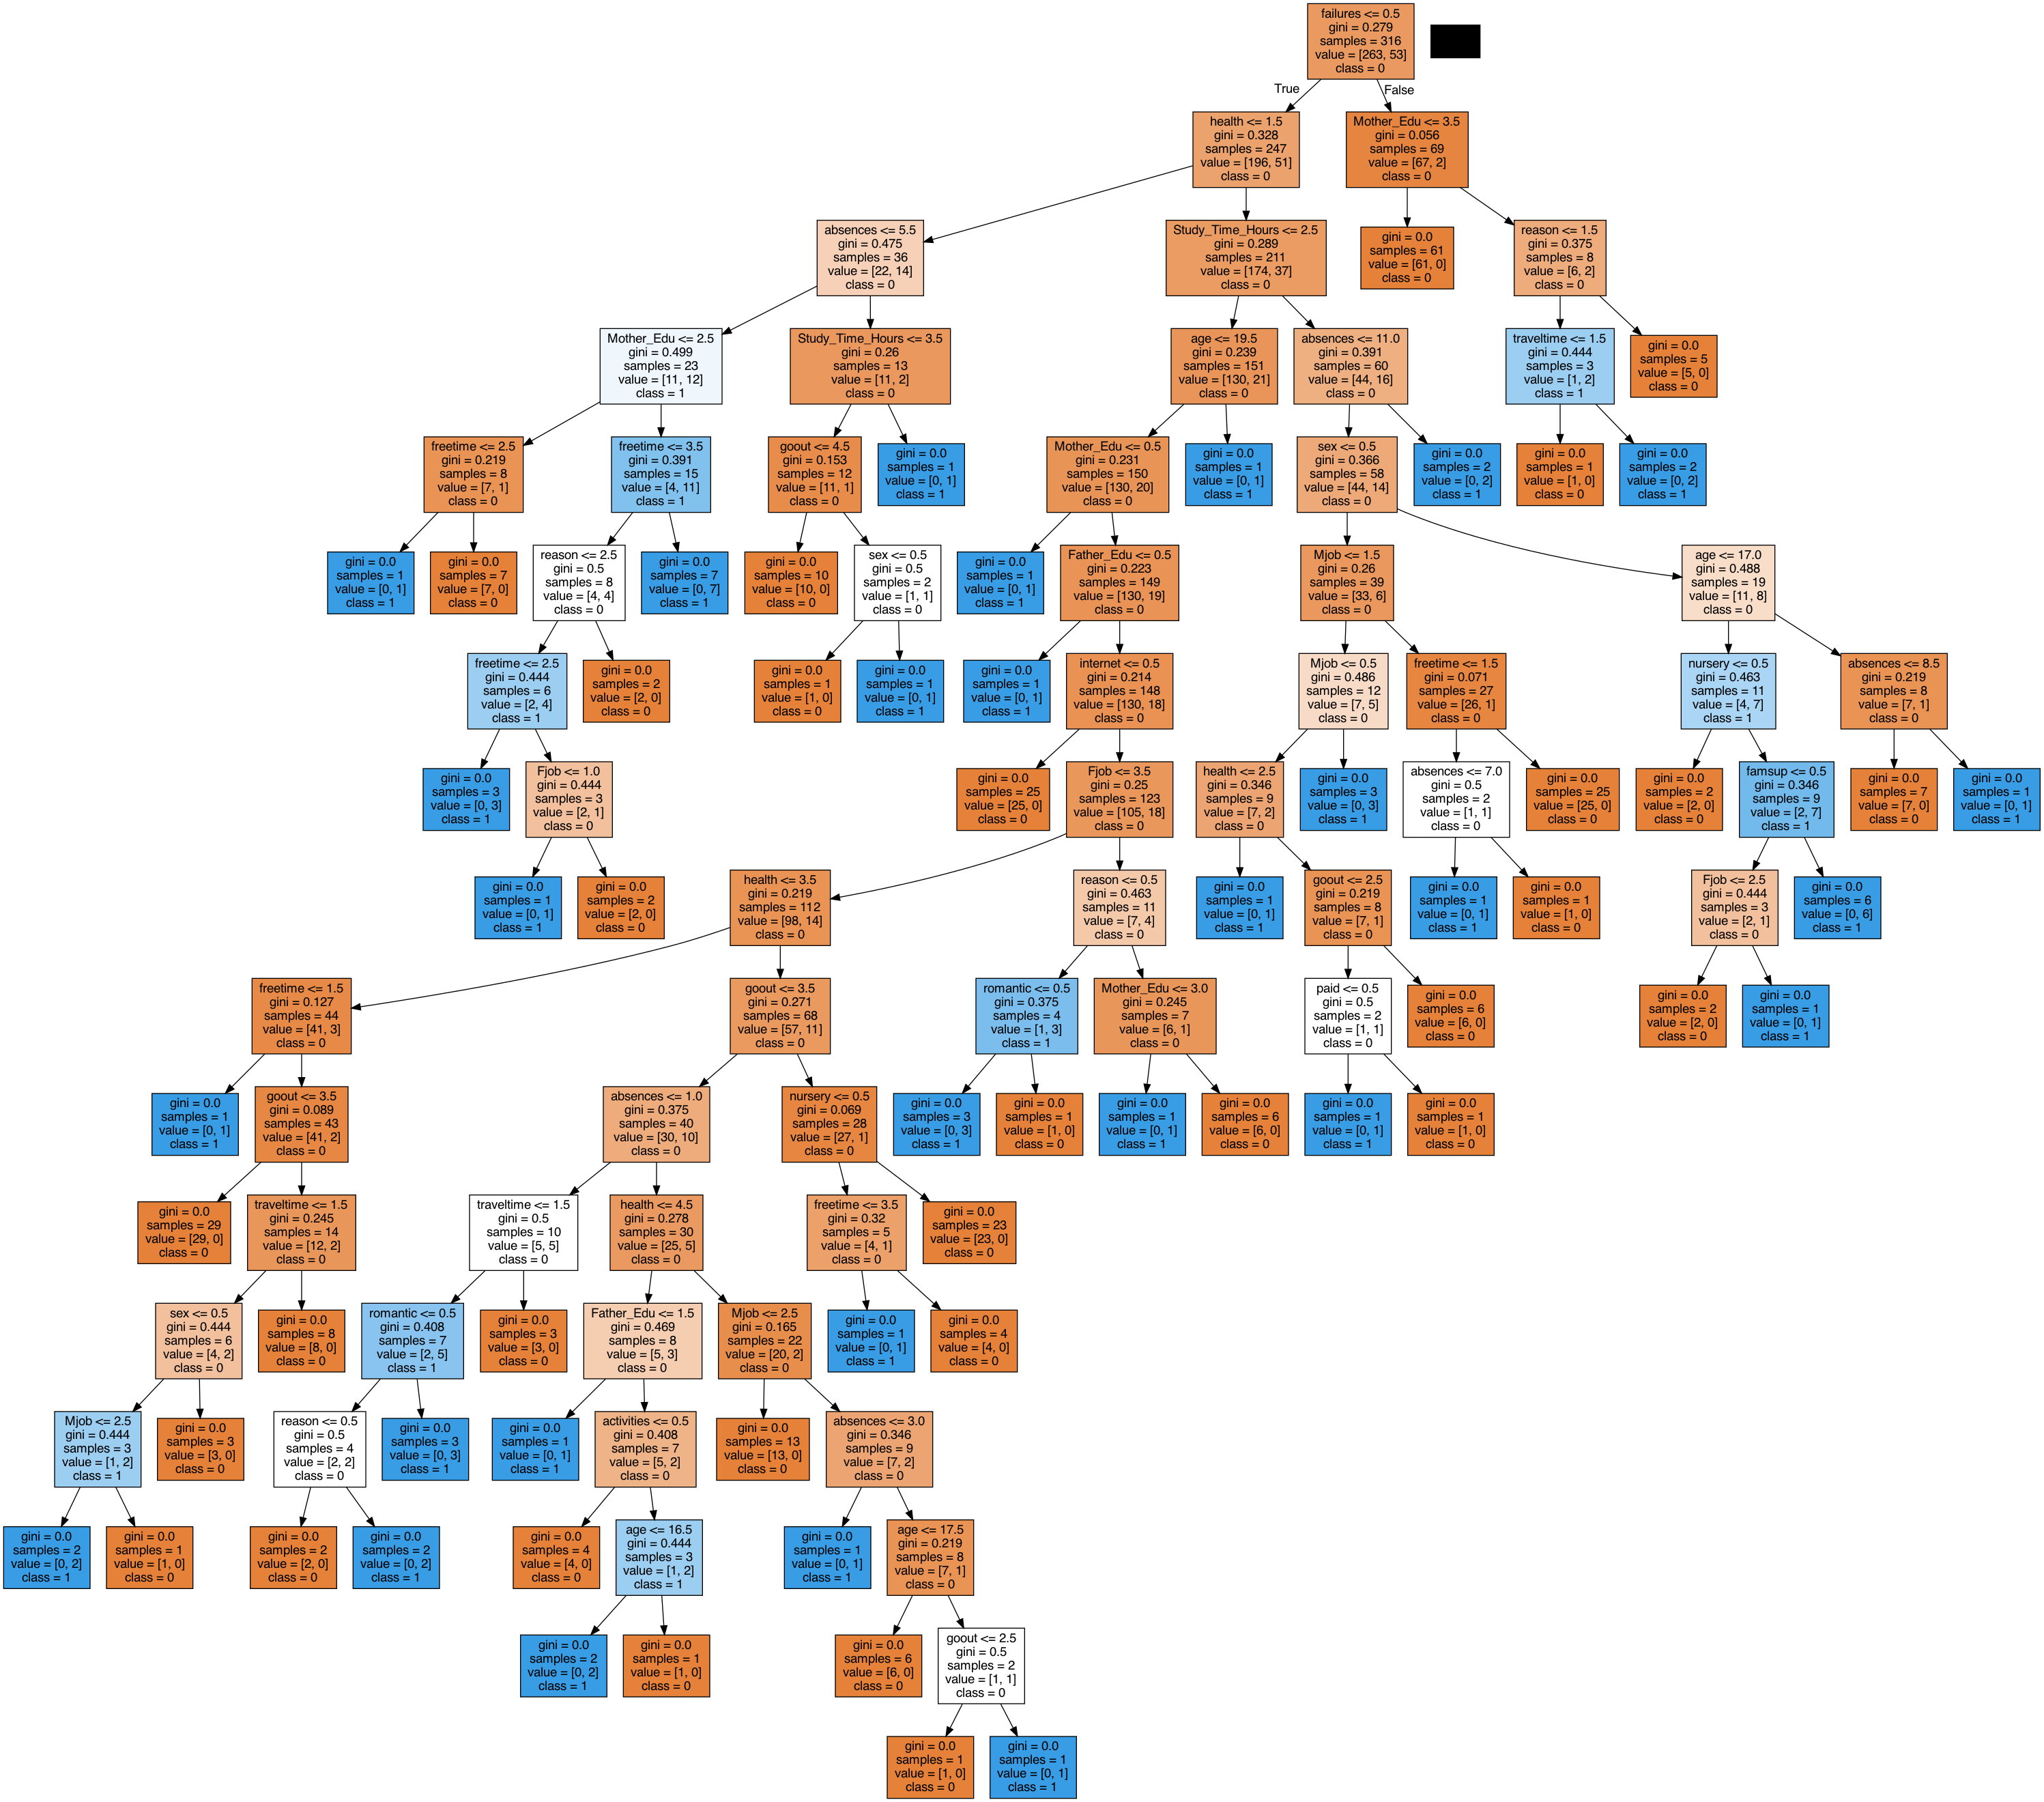

In [19]:
# Create DOT data
dot_data = tree.export_graphviz(
    tree_model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

graph
# Show graph
# Image(graph.create_png())

graph.write_png("decision_tree.png")  # Save the image as a file

# Display the image in a Jupyter notebook or Python environment
Image(graph.create_png())  # Display the image


In [41]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [42]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [43]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [49]:
#Fitting the Random Forest Model
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [50]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [51]:
# Making predictions using the testing data
randomforest_predictions = rf_model.predict(X_test_scaled)

In [52]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, randomforest_predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, randomforest_predictions)

In [54]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, randomforest_predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,58,1
Actual 1,19,1


Accuracy Score : 0.7468354430379747
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.98      0.85        59
           1       0.50      0.05      0.09        20

    accuracy                           0.75        79
   macro avg       0.63      0.52      0.47        79
weighted avg       0.69      0.75      0.66        79



In [58]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.07446747156195567, 'Feature3'),
 (0.06394745625226993, 'Feature6'),
 (0.057391103919562265, 'Feature5'),
 (0.056563845841753856, 'Feature8'),
 (0.05560852717658933, 'Feature7'),
 (0.050556553603265615, 'Feature9'),
 (0.0330418662930067, 'Feature10'),
 (0.028973210123511978, 'Feature2'),
 (0.014734031655418098, 'Feature4'),
 (0.009482442806628964, 'Feature1')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

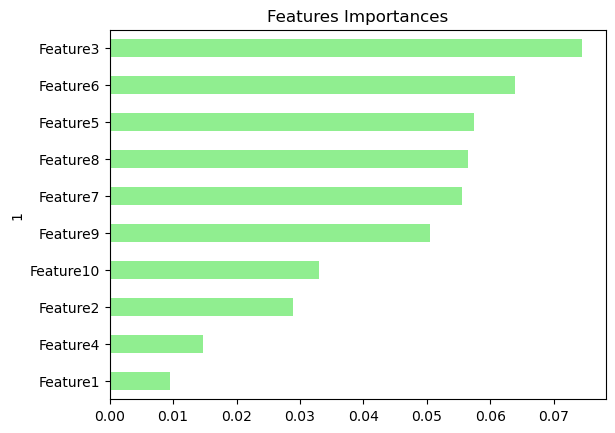

In [59]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)